In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from numpy import hstack
from numpy import asarray
import matplotlib.pyplot as plt
#import tensorflow as tf
#tf.get_logger().setLevel('ERROR')

In [2]:
def make_D(dims_in = 2):
    model = Sequential([
        Dense(25, activation = 'relu', input_dim = dims_in, kernel_initializer='he_uniform'),
        Dense(1, activation = 'sigmoid')
    ])

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [3]:
def make_G(latent_dims, dims_out = 2):
    model = Sequential([
        Dense(15, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = latent_dims),
        Dense(dims_out, activation = 'linear')
    ])

    return model

In [4]:
def make_GAN(G, D):

    D.trainable = False

    model = Sequential()
    model.add(G)
    model.add(D)
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

    return model

In [5]:
def real_samples(n = 100):
    X = rand(n) - 0.5
    Y = asarray([i*i for i in X])

    X = X.reshape(n,1)
    Y = Y.reshape(n,1)
    X = hstack((X, Y))

    y = ones((n, 1))
    return X, y

In [6]:
def generate_latent_space(latent_dims, n_points):

    X_latent = randn(n_points * latent_dims)
    X_latent = X_latent.reshape(n_points, latent_dims)

    return X_latent

def generate_new_samples(G, l_dims, n):

    X_l = generate_latent_space(l_dims, n)
    fakes = G.predict(X_l, verbose = None)
    y = zeros((n, 1))
    return fakes, y

In [7]:
def view_performance(epoch, G, D, latent_dims, n = 100):
    x_real, y_real = real_samples(n)
    x_fake, y_fake = generate_new_samples(G, latent_dims, n)

    _, acc_real = D.evaluate(x_real, y_real, verbose = 0)
    _, acc_fake = D.evaluate(x_fake, y_fake, verbose = 0)

    print(epoch, acc_real, acc_fake)

    plt.scatter(x_real[:, 0], x_real[:, 1], color='r')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='b')
    plt.show()
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    plt.savefig(filename)
    plt.close()

In [8]:
def train_gan(G, D, gan, latent_dims, n_epochs = 10000, n_batch = 128, n_eval = 2000):
    half_batch = n_batch // 2

    for i in range(n_epochs):
        x_real, y_real = real_samples(half_batch)
        x_fake, y_fake = generate_new_samples(G, latent_dims, half_batch)

        # Save the current sys.stdout
        #original_stdout = sys.stdout

        # Redirect sys.stdout to a StringIO object to suppress output
        #sys.stdout = StringIO()

        D.train_on_batch(x_real, y_real)
        D.train_on_batch(x_fake, y_fake)

        x_gan = generate_latent_space(latent_dims, n_batch)
        y_gan = ones((n_batch, 1))

        gan.train_on_batch(x_gan, y_gan)

        # Reset sys.stdout to its original value
        #sys.stdout = original_stdout

        if (i+1) % n_eval == 0:
            view_performance(i, G, D, latent_dims)

In [9]:
latent_dim = 5
discriminator = make_D()
generator = make_G(latent_dim)
gan = make_GAN(generator, discriminator)

1999 0.5199999809265137 1.0


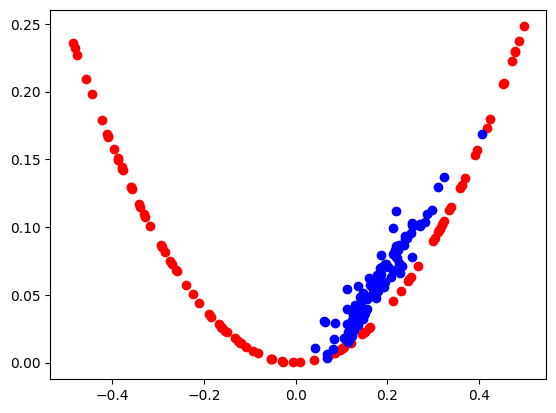

3999 0.27000001072883606 0.3799999952316284


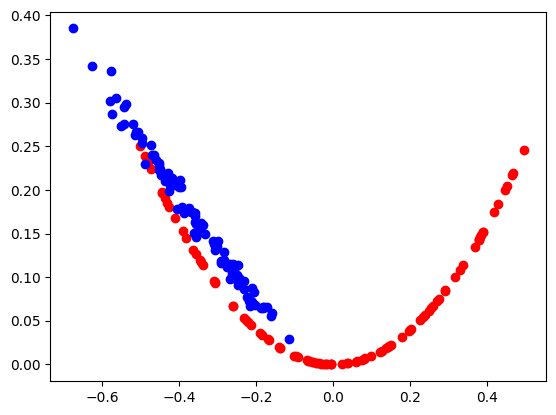

5999 0.5299999713897705 0.8799999952316284


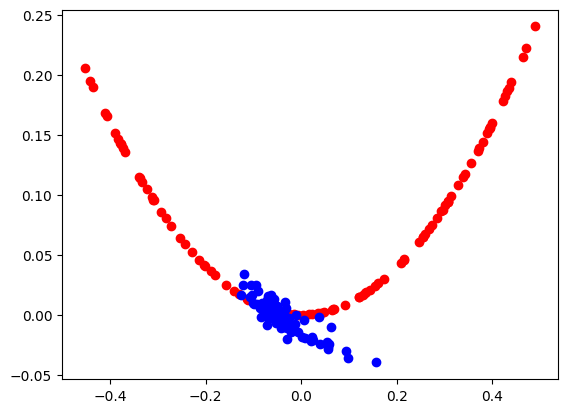

7999 0.7200000286102295 0.05000000074505806


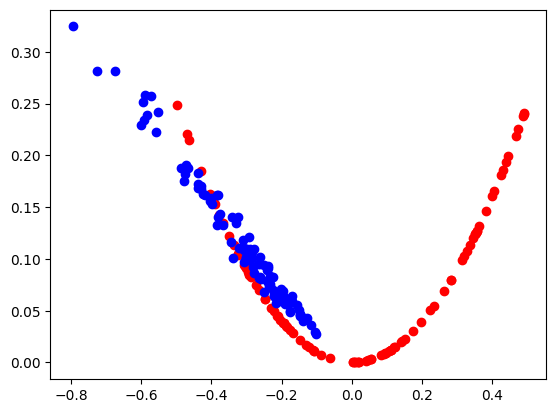

9999 0.36000001430511475 0.6000000238418579


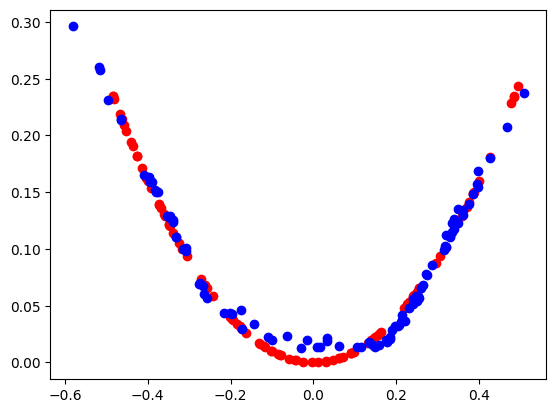

In [10]:
train_gan(generator, discriminator, gan, latent_dim)

In [ ]:
'''
SGD with adam, even though in the first four plots looks like a disgrace,
but look at that fith plot damn great job

now this is a fairly simple model but we'll get to the good ones too In Sha Allah

also note that I've tried to stopped tf logger from printing anything but errors
i've also tried to stop stdout at the train_on_batch()
this is because the predict() was printing verbose and i thought train_on_batch was doing it
until i figured it out

the fix is just to set argument verbose = None for predict()

NOTE that we do not need to train D separately beforehand
'''